In [254]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from PIL import Image
import os

# Gathering data from 3 sources 

In [255]:
#obtainign the first datafarme from the downloadble file
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [256]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [257]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = tweet_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# folder_name = 'tweet-json.txt'
# # Make directory if it doesn't already exist
# if not os.path.exists(folder_name):
#     os.makedirs(folder_name)

# with open(folder_name, 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)
# print(fails_dict)

In [258]:
#read this tweet_json.txt file line by line into a pandas DataFrame 
tweet_json= []
with open ('tweet-json.txt' ,mode='r' ) as file:
    for line in file:
        tweet_json.append(json.loads(line))

In [259]:
tweet_query = pd.DataFrame(tweet_json)

tweet_query.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [260]:
tweet_query.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [261]:
#downloading the  image-predictions.tsv into a dataframe 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (os.path.join(url.split('/')[-1]) , 'wb') as file:
    file.write(response.content)
predictions = pd.read_csv('image-predictions.tsv' ,sep ='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Assessing Data 

In [262]:
# assessing data was achieved both visually and programmtically by trying many pandas commands

In [263]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [264]:
tweet_archive_clean[tweet_archive_clean.tweet_id == 810984652412424192].text.values

array([], dtype=object)

In [265]:
tweet_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [266]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Quality issues


- text column has link in the end
- timestamp column in the tweet_archive Dataframe is string not datetime
- some invalid dog names (in lowercase) and the name column (has None instead of NaN),thse columns['doggo', 'floofer', 'pupper', 'puppo'] also have None instead NaN for missing values
- some rows dont have images
- some rows are retweets  and replys
- rating_numerator and rating_denominator need to be changed to float to accommodate for decimal values
- not all rating have been correctly exctracted from the text 
- outliers with (rating_denominator not 10 ) will affect consistency of the insight
- tweet_id in tweet_query table has the name 'id'
- only breed prediction and highest conf value is useful in predication dataframe
- chaning the tweet_archive dataframe to have only the useful columns
- just 3 columns are needed for tweet_query Dataframe ['id', 'retweet_count' , 'favorite_count']

## Tideness 

- dog stage are spread across many coloumns( doggo , pupper ... etc) in tweet_archive data

- all data can be combined 

# Cleaning Data


- Note that the issues cleaned might not be in the same order as the assessment step due to discovering new issues while cleaning (the iterative process ) , but each issue was defined, coded, tested indivudally to make it easier for review

In [267]:
#creating copys of the data 
tweet_archive_clean = tweet_archive.copy()
tweet_query_clean = tweet_query.copy()
predictions_clean  = predictions.copy()

#####  1 -define

-remove links from end of text columns 

In [268]:
#code
tweet_archive_clean.text = tweet_archive_clean.text.replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [269]:
#test
tweet_archive_clean.text[11]

'This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy '

#### 2 - define

-change timestap from string to datetime

In [270]:
#code
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

In [271]:
#text
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### 3- define

-change the missing values to NaN in dog_stage

-change the missing values to NaN in name and dropping rows with lower case names

In [272]:
#code
#replacing None with NAN value in the cols columns
cols = ['doggo', 'floofer', 'pupper', 'puppo']
tweet_archive_clean[cols] = tweet_archive_clean[cols].replace('None',np.nan)

#dropping the lowercase names
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.name.str.istitle()]

#replacing None with NAN value in name columns
tweet_archive_clean['name'] = tweet_archive_clean['name'].replace('None',np.nan)


In [273]:
#test
tweet_archive_clean.name.value_counts()[1:10]

Oliver     11
Cooper     11
Lucy       11
Lola       10
Tucker     10
Penny      10
Bo          9
Winston     9
Sadie       8
Name: name, dtype: int64

In [274]:

tweet_archive_clean[cols].head(1)

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN


#### 4- define 

- drop tweets with no images from all Dataframes

In [275]:
#code 
#choosing tweets with unique id
tweets_with_image = list(predictions_clean.tweet_id.unique())
#making sure these tweets in achrive data
len(tweets_with_image) == tweet_archive_clean.tweet_id.isin(tweets_with_image).sum()

False

In [276]:
#making sure all data frames has only tweets with unique tweet_id
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.tweet_id.isin(tweets_with_image)]
tweet_query_clean = tweet_query_clean[tweet_query_clean.id.isin(tweets_with_image)]

In [277]:
#test
tweet_archive_clean.shape

(1969, 17)

In [278]:
predictions_clean.shape

(2075, 12)

#### 5- define 

- drop retweets and replies from tweet_archive and predictions data 

In [279]:
#code
retweet_entries = tweet_archive_clean.retweeted_status_id.notnull()
tweet_archive_clean = tweet_archive_clean[~retweet_entries]

replay_entries = tweet_archive_clean.in_reply_to_status_id.notnull()
tweet_archive_clean = tweet_archive_clean[~replay_entries]

In [280]:
np.logical_not(predictions_clean.tweet_id.isin(list(tweet_archive_clean.tweet_id))).sum()

208

In [281]:
predictions_clean = predictions_clean[~np.logical_not(predictions_clean.tweet_id.isin(list(tweet_archive_clean.tweet_id)))]

In [282]:
#test
tweet_archive_clean.shape

(1867, 17)

In [283]:
predictions_clean.shape

(1867, 12)

#### 6- define 

- change rating_numerator and rating_denominator type float to accommodate for decimal values

In [284]:
#code
cols = ['rating_numerator' ,'rating_denominator']
tweet_archive_clean[cols] = tweet_archive_clean[cols].astype('float')

In [285]:
#test
tweet_archive_clean[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      1867 non-null float64
rating_denominator    1867 non-null float64
dtypes: float64(2)
memory usage: 43.8 KB


#### 7- define 

- extract the rating correctly from text column 

In [286]:
#code
ratings = tweet_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
tweet_archive_clean['rating_numerator']  = ratings[0].astype('float')
tweet_archive_clean['rating_denominator'] = ratings[1].astype('float')
tweet_archive_clean[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      1867 non-null float64
rating_denominator    1867 non-null float64
dtypes: float64(2)
memory usage: 43.8 KB


In [287]:
#test
tweet_archive_clean[cols].rating_denominator.value_counts()

10.0     1853
80.0        2
50.0        2
11.0        2
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

#### 8- define

- fix and remove outliers with (rating_denominator not 10 ) for more consisted insight

In [288]:
#code 
tweet_archive_clean[tweet_archive_clean.tweet_id == 810984652412424192].text.values
# manually removing the this tweet as it doesnt have correct rating 
index = tweet_archive_clean[tweet_archive_clean.tweet_id == 810984652412424192].index
tweet_archive_clean.drop(index , inplace= True)
tweet_archive_clean[tweet_archive_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [289]:
#removing the few outliers (rating_denominator not 10 ) for more consistent insights
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.rating_denominator == 10]

In [290]:
#test
tweet_archive_clean.rating_denominator.value_counts()

10.0    1853
Name: rating_denominator, dtype: int64

#### 9- define 

-change 'id' columns in preditcion table to  'tweet_id' to match the rest of data
- note : this step is not necessary as it can be avoided using pandas.DataFrame.merge() left_on , right_on  but just for consistency 

In [291]:
tweet_query_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [292]:
#code
tweet_query_clean['tweet_id'] = tweet_query_clean['id']

In [293]:
#test
tweet_query_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user', 'tweet_id'],
      dtype='object')

#### 10- define

- changing the tweet_query dataframe to only have 3 useful columns  ['tweet_id','retweet_count','favorite_count']

In [294]:
#code
cols =  ['tweet_id','retweet_count','favorite_count']
tweet_query_clean = tweet_query_clean[cols]

In [295]:
#test
tweet_query_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### 11- define

-chaning the tweet_archive dataframe to have only the useful columns ['tweet_id','timestamp','text','rating_numerator','rating_denominator','name' ] 

In [296]:
#code
cols =  ['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','doggo', 'floofer', 'pupper', 'puppo' ]
tweet_archive_clean = tweet_archive_clean[cols]

In [297]:
#test
tweet_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN


#### 12- define

- make ['doggo', 'floofer', 'pupper', 'puppo'] into 1 columns (stage) in tweet_archive data

In [298]:
#code 

# select the dog stages columns from the dataset
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
tweet_archive_clean['stage'] = tweet_archive_clean[cols].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan 
tweet_archive_clean.stage = tweet_archive_clean.stage.replace('', np.nan)

# drop  ['doggo', 'floofer', 'pupper', 'puppo'] columns
tweet_archive_clean = tweet_archive_clean.drop(columns = cols, axis =1)

In [299]:
#test
tweet_archive_clean.stage.value_counts()

pupper            192
doggo              61
puppo              22
doggo, pupper       7
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

#### 13- define

- reshape the predictions dataframe to have only the useful columns ['tweet_id','breed','confidance']


In [300]:
#code

#change the p1 column name to breed
predictions_clean['breed'] = predictions_clean.p1
#change the p1_conf columns name to confidance
predictions_clean['confidance'] = predictions_clean.p1_conf
#choosing these two columns only
cols = ['tweet_id','breed','confidance']
predictions_clean = predictions_clean[cols]

In [301]:
#test 
predictions_clean.head()

,tweet_id,breed,confidance
0,666020888022790149,Welsh_springer_spaniel,0.465074
4,666049248165822465,miniature_pinscher,0.560311
11,666071193221509120,Gordon_setter,0.503672
12,666073100786774016,Walker_hound,0.260857
13,666082916733198337,pug,0.489814


#### 14- define 

-merging all the datasets on 'tweet_id'

In [302]:
#code

In [303]:
#merging the archive and preditions dataframes on 'tweet_id'
df = pd.merge(tweet_archive_clean, predictions_clean, on='tweet_id')
#then merging the query dataframe into the df
df = pd.merge(df, tweet_query_clean, on = 'tweet_id')

In [304]:
#test
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,breed,confidance,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,orange,0.097049,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,paper_towel,0.170278,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,basset,0.555712,9774,41048


# Storing data

In [305]:
#storing the master dataframe into csv file
df.to_csv('twitter_archive_master.csv', index = False)

# Visualizing Data

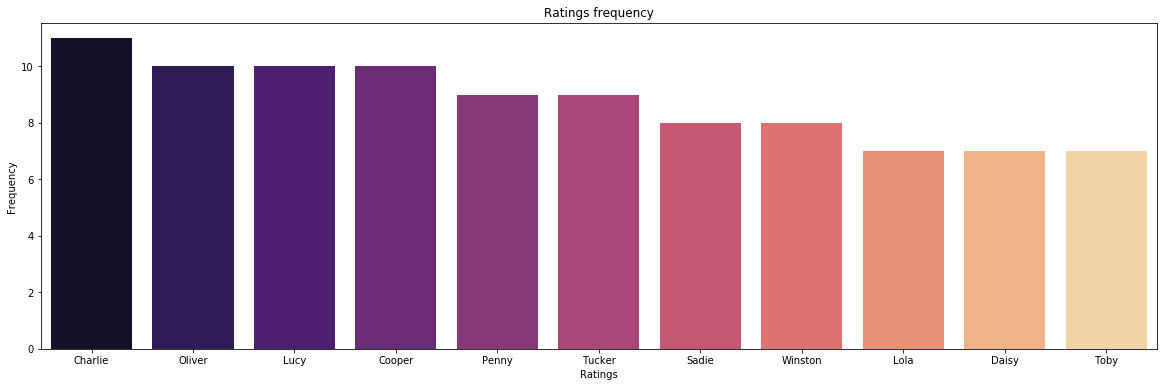

In [306]:
#top 10 dog names
names = df.name.value_counts()[:11]
x = names.index
y = names.values
fig, ax = plt.subplots(figsize=(20, 6))
graph = sns.barplot(x, y, palette='magma', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

In [1]:
#top 10 dogs breed
breeds = df.breed.value_counts()[:11]
x = breeds.index
y = breeds.values
fig, axis = plt.subplots(figsize=(20, 5))
graph = sns.barplot(x, y, palette='magma', ax=axis)
graph.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

NameError: name 'df' is not defined

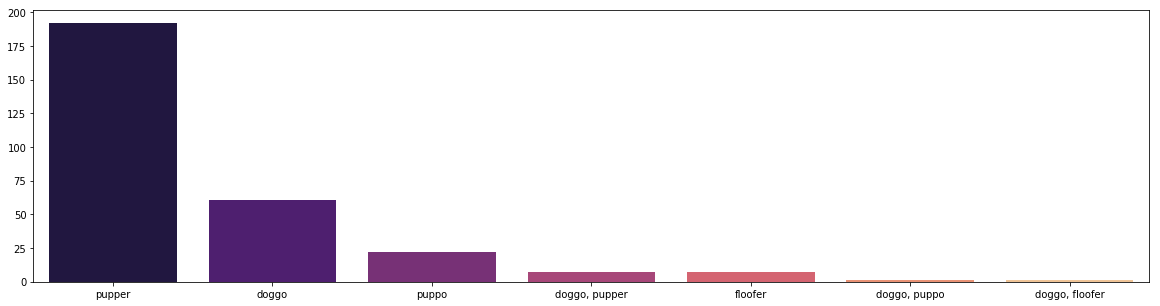

In [308]:
#dog stages insights
stages =df.stage.value_counts()
x = stages.index
y = stages.values
fig, axis = plt.subplots(figsize=(20, 5))
graph = sns.barplot(x, y, palette='magma', ax=axis)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

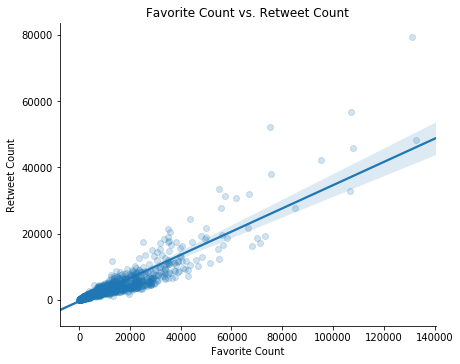

In [309]:
# Scatterplot of retweets vs favorite count

sns.lmplot(y="retweet_count", 
           x="favorite_count", 
           data=df,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.ylabel('Retweet Count');
plt.xlabel('Favorite Count');
